# LSTM Stock Prediction Model
By Joshua Jenkins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import plot_model

In [2]:
#Get the Dataset
df=pd.read_csv("MSFT_5yr.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df["Date"] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-09-26,114.470001,115.059998,113.739998,113.980003,107.988243,19352000,2018-09-26
2018-09-27,114.779999,114.910004,114.199997,114.410004,108.395660,19091300,2018-09-27
2018-09-28,114.190002,114.570000,113.680000,114.370003,108.357750,21647800,2018-09-28
2018-10-01,114.750000,115.680000,114.730003,115.610001,109.532555,18883100,2018-10-01
2018-10-02,115.300003,115.839996,114.440002,115.150002,109.096733,20787200,2018-10-02


In [3]:
#Print the shape of Dataframe and check for null values
print("Dataframe Shape:",df.shape)
print("Null Values (if any):",df.isnull().values.any())


Dataframe Shape: (1257, 7)
Null Values (if any): False


<Axes: title={'center': 'Microsoft Stock Price'}, xlabel='Date', ylabel='Price (USD)'>

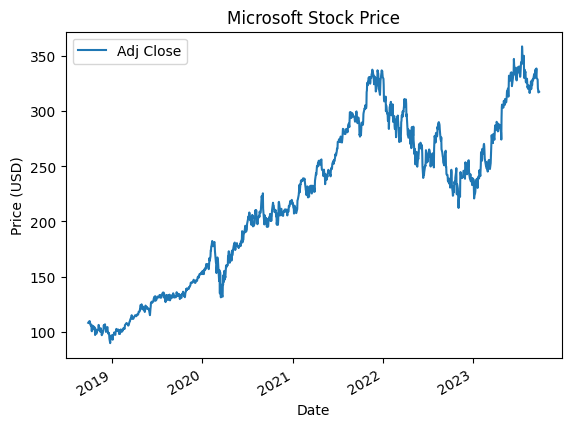

In [4]:
#Plot the closing price of the stock
df.plot(x='Date',y='Adj Close', xlabel = 'Date', ylabel = 'Price (USD)', title = 'Microsoft Stock Price')

In [5]:
#Set target variable as the closing price
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the features
features = ['Open','High','Low','Volume']

In [6]:
#Setting up scaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=df.index)
feature_transform.head()
feature_transform

,Open,High,Low,Volume
Date,,,,
2018-09-26,0.072503,0.063576,0.076524,0.101345
2018-09-27,0.073666,0.063019,0.078304,0.098795
2018-09-28,0.071453,0.061754,0.076292,0.123797
2018-10-01,0.073553,0.065883,0.080354,0.096759
2018-10-02,0.075616,0.066478,0.079232,0.115381
...,...,...,...,...
2023-09-19,0.866547,0.860906,0.891945,0.073511
2023-09-20,0.879074,0.861649,0.876470,0.121731
2023-09-21,0.840629,0.845876,0.855153,0.259555


In [7]:
#Splitting to train and test set
timesplit = TimeSeriesSplit(n_splits=10)#?
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    Y_train, Y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Data Proessing for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
X_test = testX.reshape(testX.shape[0], 1, testX.shape[1])


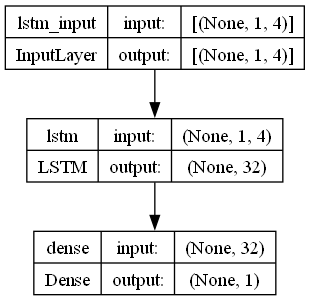

In [9]:
#LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes = True, show_layer_names =True)

In [10]:
#Training the Model
lstm.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
143/143 [==============================] - 1s 1ms/step - loss: 47677.1836
Epoch 2/100
143/143 [==============================] - 0s 1ms/step - loss: 46301.6641
Epoch 3/100
143/143 [==============================] - 0s 1ms/step - loss: 43280.1562
Epoch 4/100
143/143 [==============================] - 0s 1ms/step - loss: 38644.0664
Epoch 5/100
143/143 [==============================] - 0s 1ms/step - loss: 32994.6719
Epoch 6/100
143/143 [==============================] - 0s 1ms/step - loss: 26989.1289
Epoch 7/100
143/143 [==============================] - 0s 1ms/step - loss: 21143.0801
Epoch 8/100
143/143 [==============================] - 0s 1ms/step - loss: 15824.1807
Epoch 9/100
143/143 [==============================] - 0s 1ms/step - loss: 11270.9639
Epoch 10/100
143/143 [==============================] - 0s 1ms/step - loss: 7604.7656
Epoch 11/100
143/143 [==============================] - 0s 1ms/step - loss: 4839.9346
Epoch 12/100
143/143 [==============================] 

In [11]:
#Prediction
Y_pred = lstm.predict(X_test)
Y_pred

4/4 [==============================] - 0s 1ms/step


array([[286.15765],
       [287.08704],
       [289.92783],
       [290.93024],
       [287.352  ],
       [287.14624],
       [285.44562],
       [282.31747],
       [278.62732],
       [296.08316],
       [299.14478],
       [306.2576 ],
       [308.2216 ],
       [308.076  ],
       [307.69125],
       [307.02768],
       [308.4091 ],
       [310.13397],
       [309.46063],
       [310.89474],
       [310.19812],
       [310.65134],
       [309.94382],
       [312.4133 ],
       [313.86124],
       [317.12448],
       [318.71664],
       [321.29227],
       [320.5992 ],
       [316.05746],
       [324.38998],
       [328.4019 ],
       [335.47873],
       [332.91476],
       [329.6732 ],
       [336.58832],
       [338.16248],
       [336.21005],
       [330.62857],
       [326.35562],
       [328.21317],
       [330.30612],
       [335.78928],
       [337.21475],
       [342.9902 ],
       [349.52652],
       [340.93997],
       [337.20493],
       [337.7657 ],
       [337.1884 ],


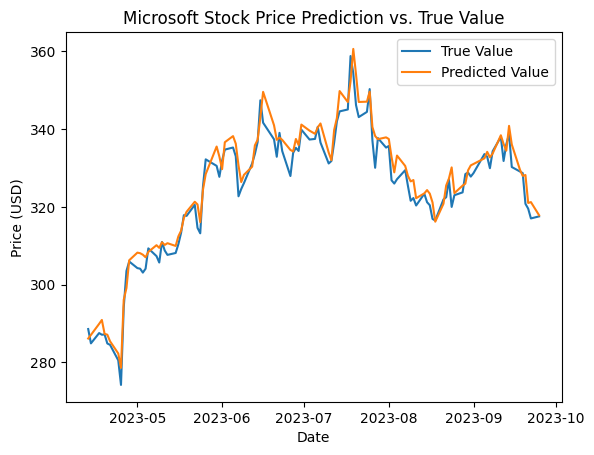

In [12]:
plt.plot(df.iloc[test_index]['Date'], Y_test, label='True Value')
plt.plot(df.iloc[test_index]['Date'], Y_pred, label='Predicted Value')
plt.title('Microsoft Stock Price Prediction vs. True Value')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()